In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
usdf = pd.read_csv("national-history.csv")
## 將美國的COVID-19資料讀取進來
usdf

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-12-29,329605.0,3283,36583.0,22838.0,5152,124686.0,676253.0,191439490.0,891791,3635.0,7885.0,19267233.0,194512,7702010.0,56,247172624,1236471
1,2020-12-28,326322.0,1491,36308.0,22592.0,3832,121235.0,671101.0,190547699.0,1181168,3612.0,7951.0,19072721.0,162190,7603260.0,56,245936153,1540320
2,2020-12-27,324831.0,1402,36164.0,22447.0,2302,118720.0,667269.0,189366531.0,1011283,3604.0,7878.0,18910531.0,153194,7530424.0,56,244395833,1383493
3,2020-12-26,323429.0,1419,36038.0,22373.0,2292,117344.0,664967.0,188355248.0,1520750,3593.0,7809.0,18757337.0,189494,7473612.0,56,243012340,2137261
4,2020-12-25,322010.0,1548,35945.0,22418.0,2001,118948.0,662675.0,186834498.0,967085,3592.0,7831.0,18567843.0,125368,7362280.0,56,240875079,1290774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2020-01-17,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,NaN,1,0,0
348,2020-01-16,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,NaN,1,0,0
349,2020-01-15,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,NaN,1,0,0
350,2020-01-14,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,NaN,1,0,0


In [61]:
len(usdf)  ##計算這個data的長度

352

In [62]:
positiveIncrease = np.array(usdf["positiveIncrease"])   #將positiveIncrease資料取出來並且轉換成array的形式
positiveIncrease.shape = (352, 1)             ###################*************這行超重要**************############################
positiveIncrease.shape
##positiveIncrease

(352, 1)

In [63]:
positiveIncrease1 = positiveIncrease[::-1]  ##因為資料是從新到舊，所以將他反轉變成舊到新
##positiveIncrease1

In [64]:
X = positiveIncrease1[:351]
Y = positiveIncrease1[1:]      ##設定ＸＹ

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                   test_size=0.2, 
                                                   random_state=87)   ##分割資料

In [66]:
regr = LinearRegression() ##開機

In [67]:
regr.fit(x_train, y_train) #預測

LinearRegression()

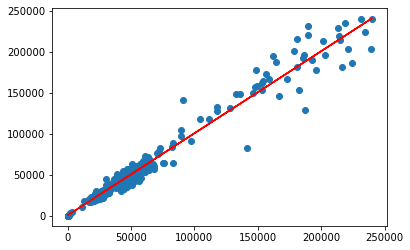

In [68]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train), "r");     ##訓練出來的資料

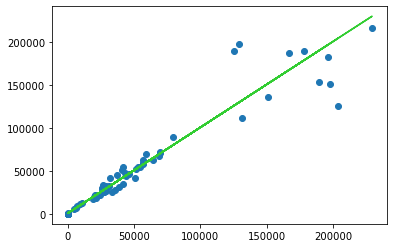

In [69]:
plt.scatter(x_test, y_test)
y_predict = regr.predict(x_test)
plt.plot(x_test, y_predict, "limegreen");    #預測出來的資料

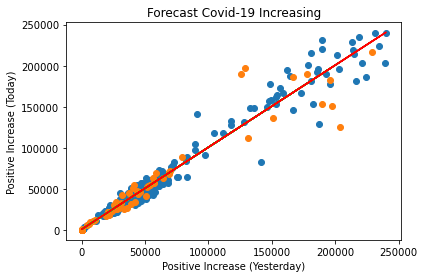

In [70]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
y_predict = regr.predict(x_test)
plt.plot(x_test, y_predict, "limegreen");  
plt.plot(x_train, regr.predict(x_train), "r");

plt.title("Forecast Covid-19 Increasing")
plt.xlabel("Positive Increase (Yesterday)")
plt.ylabel("Positive Increase (Today)")

plt.show()

In [71]:
print("預測出來的線性迴歸方程式為y = {}x + {}".format(float(regr.coef_), float(regr.intercept_))) 
print("決定係數為{}".format(regr.score(x_test, y_test)))

預測出來的線性迴歸方程式為y = 0.9994422319804038x + 731.113118111738
決定係數為0.902719635078772
